# Dimensionality Reduction


## Principal Component Analysis in-depth

Here we'll explore **Principal Component Analysis**, which is an extremely useful linear dimensionality reduction technique.

We'll start with our standard set of initial imports:

In [1]:
from __future__ import print_function, division

%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

plt.style.use('seaborn')

In [2]:
a = np.array([[2,3],
              [4,5],
              [6,7],
             [3, 6], 
             [2, 4.5], 
             [6, 6]]
            )
a

array([[2. , 3. ],
       [4. , 5. ],
       [6. , 7. ],
       [3. , 6. ],
       [2. , 4.5],
       [6. , 6. ]])

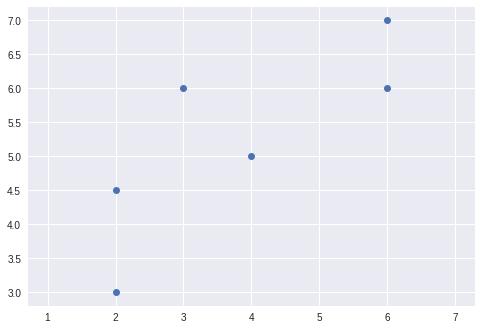

In [3]:
plt.plot(a[:, 0], 
         a[:, 1], 
         'o'
        )
plt.axis('equal');

In [4]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)

In [5]:
a

array([[2. , 3. ],
       [4. , 5. ],
       [6. , 7. ],
       [3. , 6. ],
       [2. , 4.5],
       [6. , 6. ]])

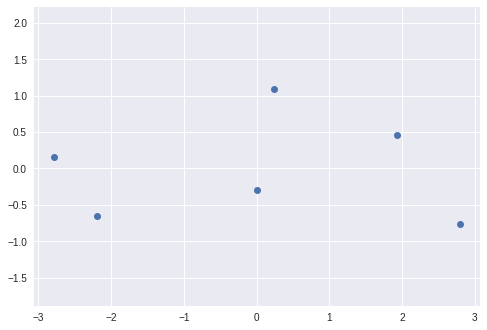

In [6]:
transA = pca.fit_transform(a)
plt.plot(transA[:, 0], 
         transA[:, 1], 
         'o'
        )
plt.axis('equal');

Now, it can be seen that, the orginal data is transformed and rotated. Now, it is around x axis. 

In [7]:
inverse = pca.inverse_transform(transA)
inverse

array([[2. , 3. ],
       [4. , 5. ],
       [6. , 7. ],
       [3. , 6. ],
       [2. , 4.5],
       [6. , 6. ]])

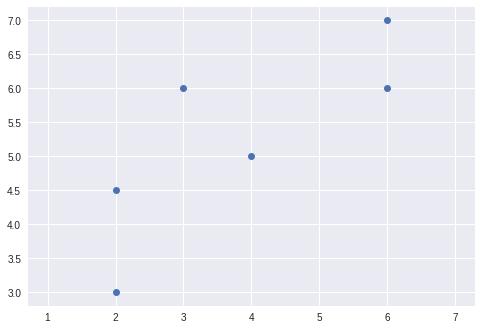

In [8]:
plt.plot(inverse[:, 0], 
         inverse[:, 1], 
         'o'
        )
plt.axis('equal');

In [9]:
pca.fit(a)
print('explained_variance_ is \t:', pca.explained_variance_)
print('components_ are \n:', pca.components_)

explained_variance_ is 	: [4.83570839 0.50595827]
components_ are 
: [[-0.81284058 -0.58248621]
 [-0.58248621  0.81284058]]


## Introducing Principal Component Analysis

* Principal Component Analysis is a very powerful unsupervised method for *dimensionality reduction* in data.  
* It's easiest to visualize by looking at a two-dimensional dataset:

In [10]:
np.random.seed(2)
np.random.random(size=(2, 10))

array([[0.4359949 , 0.02592623, 0.54966248, 0.43532239, 0.4203678 ,
        0.33033482, 0.20464863, 0.61927097, 0.29965467, 0.26682728],
       [0.62113383, 0.52914209, 0.13457995, 0.51357812, 0.18443987,
        0.78533515, 0.85397529, 0.49423684, 0.84656149, 0.07964548]])

[numpy.dot](https://numpy.org/doc/stable/reference/generated/numpy.dot.html)(a, b, out=None) 
* Dot product of two arrays
* For 2-D arrays it is the matrix product

[numpy.ndarray.T](https://numpy.org/doc/stable/reference/generated/numpy.ndarray.T.html) The transposed array.

In [11]:
np.random.seed(1)
X = np.dot(np.random.random(size=(2, 2)), 
           np.random.normal(size=(2, 200))
          ).T
X[:4, :3] #showing 4 rows, and 3 columns (we have only 2). 

array([[-0.62530162, -0.17006366],
       [ 0.96069503,  0.5909006 ],
       [-0.59854339, -0.40259339],
       [-2.22805938, -0.53257674]])

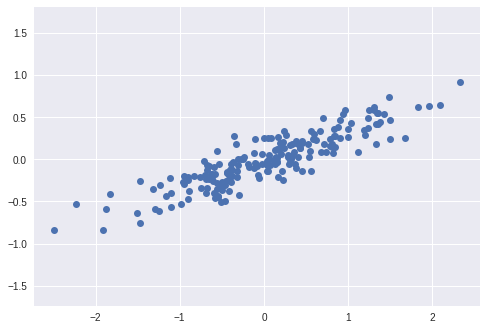

In [12]:
plt.plot(X[:, 0], 
         X[:, 1], 
         'o'
        )
plt.axis('equal');

We can see that there is a definite trend in the data. 

What PCA seeks to do is to find the **Principal Axes** in the data, and explain how important those axes are in describing the data distribution:

In [13]:
#from sklearn.decomposition import PCA
#pca = PCA(n_components=2)

In [14]:
pca.fit(X)
print('explained_variance_ is \t:', pca.explained_variance_)
print('components_ are \n:', pca.components_)

explained_variance_ is 	: [0.7625315 0.0184779]
components_ are 
: [[-0.94446029 -0.32862557]
 [-0.32862557  0.94446029]]


To see what these numbers mean, let's view them as `vectors` plotted on top of the data:

explained_variance 	 0.7625315008826115
components	 	 [-0.94446029 -0.32862557]
v is			 [-2.47419458 -0.86089761]
finished ploting a component


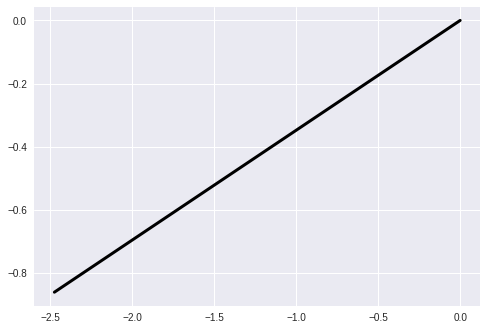

In [15]:
for var, comp in zip(pca.explained_variance_, 
                     pca.components_):
  
    print('explained_variance \t', var)
    print('components\t \t', comp)

    v = comp * 3 * np.sqrt(var)

    print('v is\t\t\t', v)

    x = (0, v[0]) #when x is 0, y is also 0
    y = (0, v[1]) #when x is v[0], y is v[1]
    
    plt.plot(x, y, 
             '-k', 
             lw=3
            )
    
    print('finished ploting a component')
    break

* more examples @ [plt.plot](https://stackabuse.com/matplotlib-line-plot-tutorial-and-examples/)
* more about [axis](https://predictablynoisy.com/matplotlib/api/_as_gen/matplotlib.pyplot.axis.html)

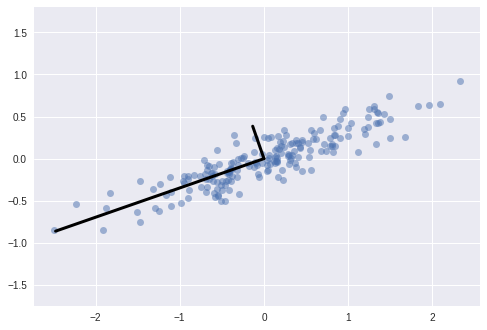

In [16]:
plt.plot(X[:, 0], 
         X[:, 1], 
         'o', 
         alpha=0.5
        )

for length, vector in zip(pca.explained_variance_, pca.components_):
    v = vector * 3 * np.sqrt(length)
    plt.plot([0, v[0]], 
             [0, v[1]], 
             '-k', 
             lw=3
            )
plt.axis('equal'); #changes limits of x or y axis so that equal increments of x and y have the same length

Notice that one vector is longer than the other. 

* In a sense, this tells us that that direction in the data is somehow more "important" than the other direction.
* The explained variance quantifies this measure of "importance" in direction.

* Another way to think of it is that the second principal component could be **completely ignored** without much loss of information! 

### Let's see what our data look like if we only keep 95% of the variance:

In [17]:
clf = PCA(0.95) # keep 95% of variance
X_trans = clf.fit_transform(X) #clf says 95% of variance, then fit then transform. 
print('shape of original data \t\t:', X.shape)
print('shape of transformed data \t:', X_trans.shape)
print('Original data \n:', X[:4, :3]) #has x and y components
print('New data \n:', X_trans[:4, :3]) #has only ONE component (in terms of x and y)

shape of original data 		: (200, 2)
shape of transformed data 	: (200, 1)
Original data 
: [[-0.62530162 -0.17006366]
 [ 0.96069503  0.5909006 ]
 [-0.59854339 -0.40259339]
 [-2.22805938 -0.53257674]]
New data 
: [[ 0.67676923]
 [-1.07121393]
 [ 0.72791236]
 [ 2.30964136]]


* By specifying that we want to throw away 5% of the variance, the data is now compressed by a factor of 50% (1 out of 2 (1/2))! 

### Let's see what the data look like after this compression:

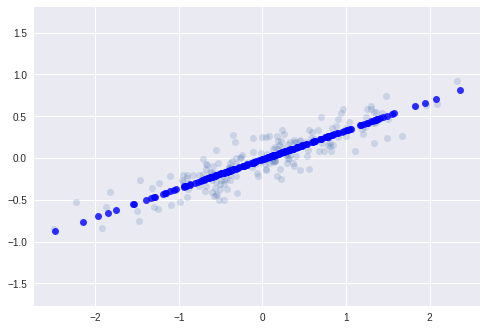

In [18]:
X_new = clf.inverse_transform(X_trans)
plt.plot(X[:, 0], 
         X[:, 1], 
         'o', 
         alpha=0.2
        ) #the original graph

plt.plot(X_new[:, 0], 
         X_new[:, 1], 
         'ob', 
         alpha=0.8
        )# the new data

plt.axis('equal');

* The light points are the original data
* The dark points are the projected version.  

We see that after truncating 5% of the variance of this dataset and then reprojecting it, the `"most important" features` of the data are maintained, and we've compressed the data by 50%!

This is the sense in which "dimensionality reduction" works: 
* if you can approximate a data set in a lower dimension, you can often have an easier time visualizing it or fitting complicated models to the data.

### Eg2: Application of PCA to Digits

The dimensionality reduction might seem a bit abstract in two dimensions, but the projection and dimensionality reduction can be extremely useful when visualizing high-dimensional data.  

Let's take a quick look at the application of PCA to the digits data we looked at before:

In [19]:
from sklearn.datasets import load_digits
digits = load_digits()
type(digits)

sklearn.utils.Bunch

In [20]:
digits

{'data': array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ..., 10.,  0.,  0.],
        [ 0.,  0.,  0., ..., 16.,  9.,  0.],
        ...,
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  2., ..., 12.,  0.,  0.],
        [ 0.,  0., 10., ..., 12.,  1.,  0.]]),
 'target': array([0, 1, 2, ..., 8, 9, 8]),
 'frame': None,
 'feature_names': ['pixel_0_0',
  'pixel_0_1',
  'pixel_0_2',
  'pixel_0_3',
  'pixel_0_4',
  'pixel_0_5',
  'pixel_0_6',
  'pixel_0_7',
  'pixel_1_0',
  'pixel_1_1',
  'pixel_1_2',
  'pixel_1_3',
  'pixel_1_4',
  'pixel_1_5',
  'pixel_1_6',
  'pixel_1_7',
  'pixel_2_0',
  'pixel_2_1',
  'pixel_2_2',
  'pixel_2_3',
  'pixel_2_4',
  'pixel_2_5',
  'pixel_2_6',
  'pixel_2_7',
  'pixel_3_0',
  'pixel_3_1',
  'pixel_3_2',
  'pixel_3_3',
  'pixel_3_4',
  'pixel_3_5',
  'pixel_3_6',
  'pixel_3_7',
  'pixel_4_0',
  'pixel_4_1',
  'pixel_4_2',
  'pixel_4_3',
  'pixel_4_4',
  'pixel_4_5',
  'pixel_4_6',
  'pixel_4_7',
  'pixel_5_0',
  'pixel_5_1',
 

In [21]:
X = digits.data
X.shape

(1797, 64)

In [22]:
y = digits.target
y

array([0, 1, 2, ..., 8, 9, 8])

In [23]:
X[0].size

64

In [24]:
## X = X[:2] #copying only 2 rows 

In [25]:
X

array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]])

In [26]:
pca = PCA(2)  # project from 64 (columns) to 2 dimensions
Xproj = pca.fit_transform(X)
print(X.shape)
print(Xproj.shape)

(1797, 64)
(1797, 2)


In [27]:
Xproj

array([[ -1.25946724,  21.27488447],
       [  7.95761004, -20.76869597],
       [  6.9919247 ,  -9.95598871],
       ...,
       [ 10.80128393,  -6.96025223],
       [ -4.87209607,  12.42396213],
       [ -0.34438816,   6.36554664]])

In [28]:
Xproj[0].size

2

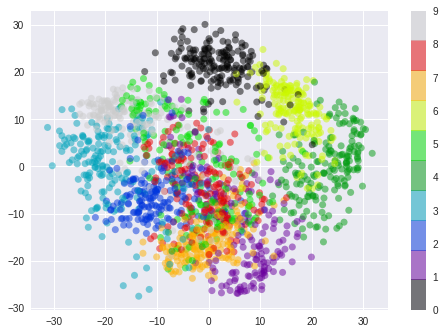

In [29]:
plt.scatter(Xproj[:, 0], 
            Xproj[:, 1], 
            c=y, #color based on y column
            edgecolor='none', 
            alpha=0.5,
            cmap=plt.cm.get_cmap('nipy_spectral', 10)
           )
plt.colorbar();

* This gives us an idea of the relationship between the digits. 
* Essentially, we have found the optimal stretch and rotation in 64-dimensional space that allows us to see the layout of the digits, **without reference** to the labels.

More on [pca](PCA.ipynb)

### What do the Components Mean?

* PCA is a very useful dimensionality reduction algorithm, because it has a very intuitive interpretation via *eigenvectors*.

The input data is represented as a `vector`: in the case of the digits, our data is

$$
x = [x_1, x_2, x_3 \cdots]
$$

but what this really means is

$$
image(x) = x_1 \cdot{\rm (pixel~1)} + x_2 \cdot{\rm (pixel~2)} + x_3 \cdot{\rm (pixel~3)} \cdots
$$

If we reduce the dimensionality in the pixel space to (say) 6, we recover only a partial image:

In [30]:
def plot_image_components(x, 
                          coefficients=None, 
                          mean=0, 
                          components=None,
                          imshape=(8, 8), 
                          n_components=6, 
                          fontsize=12
                         ):
    if coefficients is None:
        coefficients = x
        
    if components is None:
        components = np.eye(len(coefficients), 
                            len(x)
                           )
        
    mean = np.zeros_like(x) + mean
        

    fig = plt.figure(figsize=(1.2 * (5 + n_components), 
                              1.2 * 2)
                    )
    g = plt.GridSpec(2, 
                     5 + n_components, 
                     hspace=0.3)

    def show(i, 
             j, 
             x, 
             title=None
            ):
        ax = fig.add_subplot(g[i, j], 
                             xticks=[], 
                             yticks=[]
                            )
        ax.imshow(x.reshape(imshape), 
                  interpolation='nearest'
                 )
        if title:
            ax.set_title(title, 
                         fontsize=fontsize
                        )

    show(slice(2), 
         slice(2), 
         x, 
         "True"
        )

    approx = mean.copy()
    show(0, 
         2, 
         np.zeros_like(x) + mean, 
         r'$\mu$'
        )
    show(1, 
         2, 
         approx, 
         r'$1 \cdot \mu$'
        )

    for i in range(0, n_components):
        approx = approx + coefficients[i] * components[i]
        show(0, 
             i + 3, 
             components[i], 
             r'$c_{0}$'.format(i + 1)
            )
        show(1, 
             i + 3, 
             approx,
             r"${0:.2f} \cdot c_{1}$".format(coefficients[i], i + 1))
        
        plt.gca().text(0, 
                       1.05, 
                       '$+$', 
                       ha='right', 
                       va='bottom',
                       transform=plt.gca().transAxes, 
                       fontsize=fontsize
                      )

    show(slice(2), 
         slice(-2,  None ), 
         approx, 
         "Approx"
        )

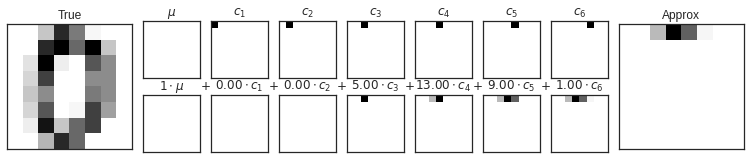

In [31]:
with plt.style.context('seaborn-white'):
    plot_image_components(digits.data[0])

But the pixel-wise representation is not the only choice. 

We can also use other *basis functions*, and write something like

$$
image(x) = {\rm mean} + x_1 \cdot{\rm (basis~1)} + x_2 \cdot{\rm (basis~2)} + x_3 \cdot{\rm (basis~3)} \cdots
$$

What PCA does is to choose optimal **basis functions** so that only a few are needed to get a reasonable approximation.

The low-dimensional representation of our data is the coefficients of this series, and the approximate reconstruction is the result of the sum:

In [32]:
def plot_pca_interactive(data, 
                         n_components=6# if you change this, change in plot_image_components as well
                        ):
    from sklearn.decomposition import PCA
    from ipywidgets import interact

    pca = PCA(n_components=n_components)
    Xproj = pca.fit_transform(data)

    def show_decomp(i=1):
        plot_image_components(data[i], 
                              Xproj[i],
                              pca.mean_, 
                              pca.components_
                             )
    
    interact(show_decomp, 
             i=(0, data.shape[0] - 1)
            );

In [33]:
digits.data

array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]])

In [34]:
plot_pca_interactive(digits.data)

interactive(children=(IntSlider(value=1, description='i', max=1796), Output()), _dom_classes=('widget-interact…

Here we see that with only six PCA components, we recover a reasonable approximation of the input!

Thus we see that PCA can be viewed from two angles. 
1. It can be viewed as **dimensionality reduction**, or 
2. It can be viewed as a form of **lossy data compression** where the loss favors noise. 

In this way, PCA can be used as a **filtering** process as well.

### Choosing the Number of Components

* But how much information have we thrown away?  

We can figure this out by looking at the **explained variance** as a function of the components:

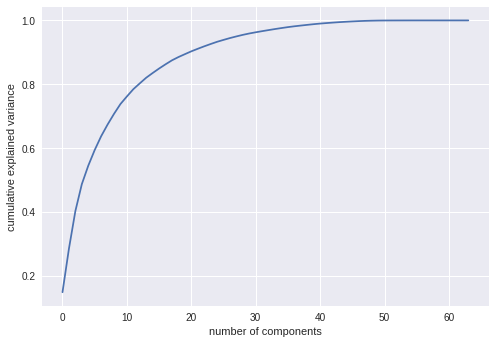

In [35]:
X = digits.data
pca = PCA().fit(X)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

In [36]:
import pandas as pd

In [37]:
pcsSummary = pd.DataFrame({'Standard deviation': np.sqrt(pca.explained_variance_),
                          'Proportion of variance': pca.explained_variance_ratio_,
                          'Cumulative proportion': np.cumsum(pca.explained_variance_ratio_)#column 
                          }
                          ).T
pcsSummary

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
Standard deviation,13.379347,12.795224,11.907495,10.054868,8.337456,7.688207,7.203092,6.634388,6.349094,6.083732,...,0.199164,0.122272,0.092049,0.060197,0.035736,2.571519e-02,2.030328e-02,1.069050e-15,1.069050e-15,1.060861e-15
Proportion of variance,0.148906,0.136188,0.117946,0.084100,0.057824,0.049169,0.043160,0.036614,0.033532,0.030788,...,0.000033,0.000012,0.000007,0.000003,0.000001,5.500746e-07,3.429057e-07,9.506876e-34,9.506876e-34,9.361795e-34
Cumulative proportion,0.148906,0.285094,0.403040,0.487139,0.544964,0.594133,0.637293,0.673906,0.707439,0.738227,...,0.999976,0.999988,0.999995,0.999998,0.999999,9.999997e-01,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00


Here we see that: 
* our two-dimensional projection loses a lot of information (as measured by the explained variance) 
* we'd need about 20 components to retain 90% of the variance.  

Looking at this plot for a high-dimensional dataset can help you understand the level of redundancy present in multiple observations.

### PCA as data compression

As we mentioned, PCA can be used for is a sort of data compression. Using a small ``n_components`` allows you to represent a high dimensional point as a sum of just a few principal vectors.

Here's what a single digit looks like as you change the number of components:

In [38]:
a = np.array([[2,3],
              [4,5],
              [6,7]])
    
for i in a.flat:
    print(i)

2
3
4
5
6
7


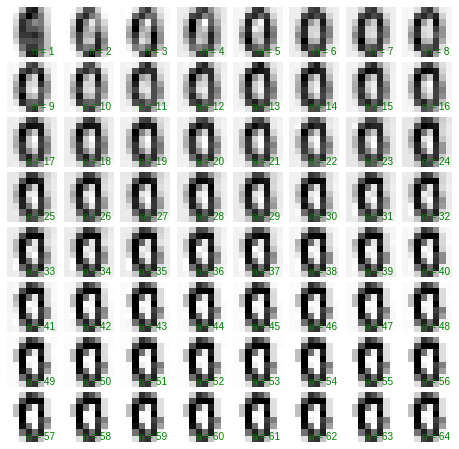

In [39]:
fig, axes = plt.subplots(8, 
                         8, 
                         figsize=(8, 8)
                        )
fig.subplots_adjust(hspace=0.1, 
                    wspace=0.1
                   )

for i, ax in enumerate(axes.flat):
    pca = PCA(i + 1).fit(X)
    im = pca.inverse_transform(pca.transform(X[20:21]))

    ax.imshow(im.reshape((8, 8)), 
              cmap='binary')
    ax.text(0.95, 
            0.05, 
            'n = {0}'.format(i + 1), 
            ha='right',
            transform=ax.transAxes, 
            color='green')
    ax.set_xticks([])
    ax.set_yticks([])

Let's take another look at this by using IPython's ``interact`` functionality to view the reconstruction of several images at once:

In [40]:
from ipywidgets import interact

def plot_digits(n_components):
    fig = plt.figure(figsize=(8, 8))
    plt.subplot(1, 1, 1, 
                frameon=False, 
                xticks=[], 
                yticks=[]
               )
    nside = 10
    
    pca = PCA(n_components).fit(X)
    Xproj = pca.inverse_transform(pca.transform(X[:nside ** 2]))
    Xproj = np.reshape(Xproj, 
                       (nside, nside, 8, 8)
                      )
    total_var = pca.explained_variance_ratio_.sum()
    
    im = np.vstack([np.hstack([Xproj[i, j] for j in range(nside)])
                    for i in range(nside)])
    plt.imshow(im)
    plt.grid(False)
    plt.title("n = {0}, variance = {1:.2f}".format(n_components, total_var),
                 size=18)
    plt.clim(0, 16)
    
interact(plot_digits, n_components=[1,2,3,10, 64], nside=[1, 8]);

interactive(children=(Dropdown(description='n_components', options=(1, 2, 3, 10, 64), value=1), Output()), _do…

* It is important to know when the Principal Components generated by the PCA will not be useful: `when your features are uncorrelated with each other`.


* If it is very uncorrelated, then you have a good point on not applying PCA.

## Other Dimensionality Reducting Routines

Note that scikit-learn contains many other unsupervised dimensionality reduction routines: some you might wish to try are:

- [sklearn.decomposition.PCA](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html): 
   Principal Component Analysis
- [sklearn.decomposition.RandomizedPCA](https://scikit-learn.org/0.15/modules/generated/sklearn.decomposition.RandomizedPCA.html):
   extremely fast approximate PCA implementation based on a randomized algorithm
- [sklearn.decomposition.SparsePCA](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.SparsePCA.html):
   PCA variant including L1 penalty for sparsity
- [sklearn.decomposition.FastICA](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.FastICA.html):
   Independent Component Analysis
- [sklearn.decomposition.NMF](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.NMF.html):
   non-negative matrix factorization
- [sklearn.manifold.LocallyLinearEmbedding](https://scikit-learn.org/stable/modules/generated/sklearn.manifold.LocallyLinearEmbedding.html):
   nonlinear manifold learning technique based on local neighborhood geometry
- [sklearn.manifold.IsoMap](https://scikit-learn.org/stable/modules/generated/sklearn.manifold.Isomap.html):
   nonlinear manifold learning technique based on a sparse graph algorithm
   
Each of these has its own strengths & weaknesses, and areas of application. You can read about them on the [scikit-learn website](http://sklearn.org).

<!--NAVIGATION-->
< [previous](prev) | [Contents](Index.ipynb) | [next](next.ipynb) >